In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive
import librosa
import librosa.display
import IPython.display as ipd

In [ ]:
drive.mount('/content/gdrive') # Run and choose your school google drive and copy and paste the key and press enter

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/MyDrive/DSCI400/Coswara-Data-master/Coswara-Data-master') # I think this should work, but navigate to the folder where Coswara Data Master is

In [ ]:
df = pandas.read_csv('/content/gdrive/MyDrive/DSCI400/Coswara-Data-master/Coswara-Data-master/combined_data.csv', index_col = 'id') # Upload (drag and drop) the csv file to your working directory
df

,a,covid_status,ep,g,l_c,l_l,l_s,rU,asthma,cough,smoker,ht,cold,diabetes,um,ihd,bd,st,fever,ftg,mp,loss_of_smell,test_status,pneumonia,diarrhoea,cld
id,,,,,,,,,,,,,,,,,,,,,,,,,,
DRBAZX64nuVtqBQf13gH7r36Mh52,26,healthy,y,female,United States,Madison,Wisconsin,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jw7YMfwGqMX22UbHh1TTgYMTYWs1,16,healthy,y,female,India,24 pargana,West Bengal,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xa2v8z3Yzgb9dFrq2gEZz6oS7fh1,26,resp_illness_not_identified,y,male,India,Kolkata,West Bengal,n,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xwHQrG0KwjTLJvBYVtVXfHp4JAd2,32,resp_illness_not_identified,y,male,Sri Lanka,Sri Jatawardanapura,Western Province,n,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xKW2EpGmJcfigLecUTLVXEWQHPg2,22,healthy,y,male,India,Kolkata,West Bengal,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sy1VK1UgX0ZMcMJitgPal1sp8jj2,20,healthy,y,female,India,Bangalore,Karnataka,n,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4drDZUlQcteX5StlFT2CXEL0N0L2,57,healthy,y,male,India,bangalore,Karnataka,n,NaN,NaN,NaN,NaN,NaN,True,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qSDQMZj4iqhaRUz1SvwiUqyUzKH3,52,healthy,y,male,India,Bangalore,Karnataka,n,NaN,True,NaN,NaN,True,NaN,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Amar
df = pandas.read_csv('combined_data.csv', index_col = 'id')
df

,a,covid_status,ep,g,l_c,l_l,l_s,rU,asthma,cough,smoker,ht,cold,diabetes,um,ihd,bd,st,fever,ftg,mp,loss_of_smell,test_status,pneumonia,diarrhoea,cld
id,,,,,,,,,,,,,,,,,,,,,,,,,,
DRBAZX64nuVtqBQf13gH7r36Mh52,26,healthy,y,female,United States,Madison,Wisconsin,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jw7YMfwGqMX22UbHh1TTgYMTYWs1,16,healthy,y,female,India,24 pargana,West Bengal,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xa2v8z3Yzgb9dFrq2gEZz6oS7fh1,26,resp_illness_not_identified,y,male,India,Kolkata,West Bengal,n,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xwHQrG0KwjTLJvBYVtVXfHp4JAd2,32,resp_illness_not_identified,y,male,Sri Lanka,Sri Jatawardanapura,Western Province,n,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xKW2EpGmJcfigLecUTLVXEWQHPg2,22,healthy,y,male,India,Kolkata,West Bengal,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sy1VK1UgX0ZMcMJitgPal1sp8jj2,20,healthy,y,female,India,Bangalore,Karnataka,n,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4drDZUlQcteX5StlFT2CXEL0N0L2,57,healthy,y,male,India,bangalore,Karnataka,n,NaN,NaN,NaN,NaN,NaN,True,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qSDQMZj4iqhaRUz1SvwiUqyUzKH3,52,healthy,y,male,India,Bangalore,Karnataka,n,NaN,True,NaN,NaN,True,NaN,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Initial Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1503 entries, DRBAZX64nuVtqBQf13gH7r36Mh52 to JQyIFoDDO1fwOuEH0GaOFskQ90q1
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   a              1503 non-null   int64 
 1   covid_status   1503 non-null   object
 2   ep             1503 non-null   object
 3   g              1503 non-null   object
 4   l_c            1503 non-null   object
 5   l_l            1312 non-null   object
 6   l_s            1503 non-null   object
 7   rU             823 non-null    object
 8   asthma         59 non-null     object
 9   cough          102 non-null    object
 10  smoker         110 non-null    object
 11  ht             91 non-null     object
 12  cold           81 non-null     object
 13  diabetes       76 non-null     object
 14  um             465 non-null    object
 15  ihd            5 non-null      object
 16  bd             20 non-null     object
 17  st             51 non-nul

In [ ]:
df.describe()

,a
count,1503.000000
mean,33.163007
std,12.149892
min,1.000000
25%,24.000000
50%,30.000000
75%,40.000000
max,87.000000


Text(0, 0.5, 'Frequency')

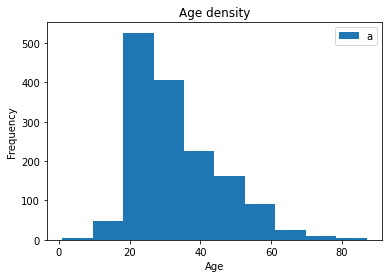

In [ ]:
ax = df.plot.hist(['a'], title='Age density')
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")

# Data Access

In [ ]:
# Run just in case, also ! is for linux commands
#!pip install  numpy keras librosa matplotlib 
#!apt-get install -y -qq ffmpeg

In [ ]:
y, sr = librosa.load('/content/gdrive/MyDrive/DSCI400/Coswara-Data-master/Coswara-Data-master/Extracted_data/20200413/0Rlzhiz6bybk77wdLjxwy7yLDhg1/cough-heavy.wav')

In [ ]:
dur = librosa.get_duration(y, 22000)
dur

5.217181818181818

In [ ]:
y.shape # 114,778 is equivalent to 5.217181818181818 seconds; therefore 5*22000=110,000 is 5 seconds

(114778,)

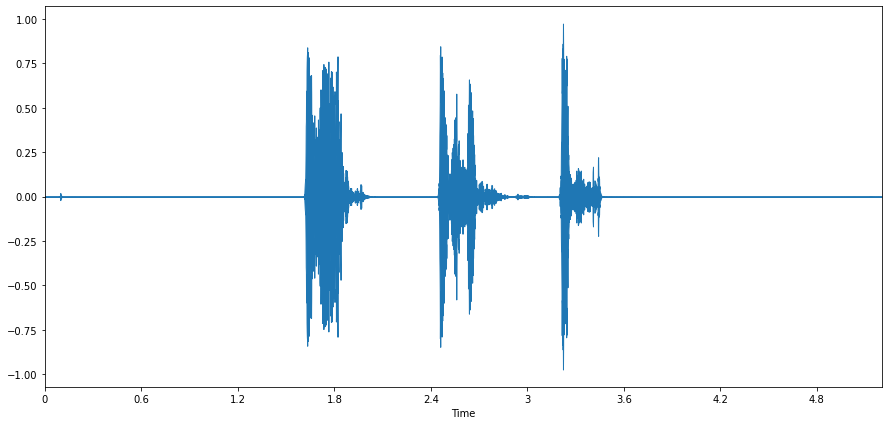

In [ ]:
plt.figure(figsize=(15,7))
librosa.display.waveplot(y,sr=sr)

In [ ]:
ipd.Audio(y,rate=sr)

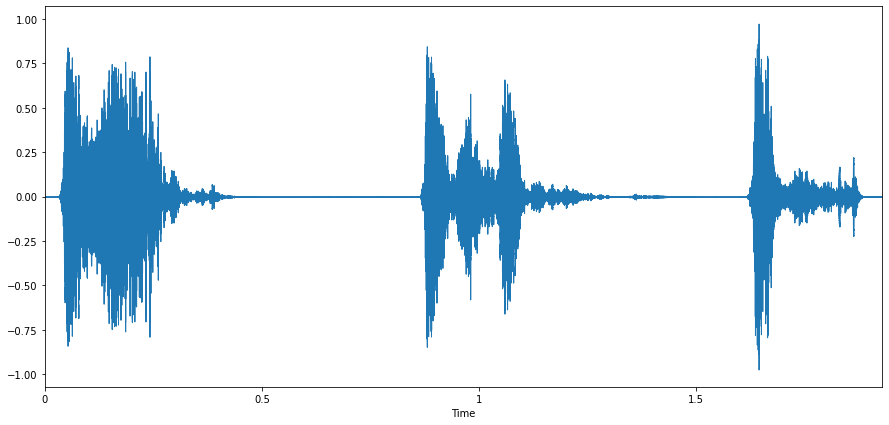

In [ ]:
y, sr = librosa.load('/content/gdrive/MyDrive/DSCI400/Coswara-Data-master/Coswara-Data-master/Extracted_data/20200413/0Rlzhiz6bybk77wdLjxwy7yLDhg1/cough-heavy.wav')
# Trim the beginning and ending silence
yt, index = librosa.effects.trim(y, top_db=30)

plt.figure(figsize=(15,7))
librosa.display.waveplot(yt,sr=sr)

ipd.Audio(yt,rate=sr)

array([[ 0,  0,  0, ...,  0,  0, 74],
       [ 0,  0,  0, ...,  0, 10, 86],
       [ 0,  0,  0, ...,  3,  0, 81],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

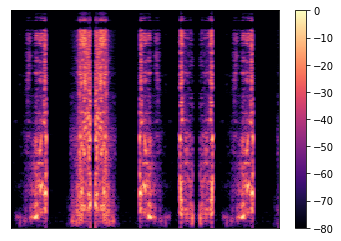

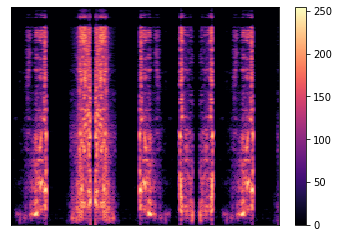

In [ ]:
def create_mel(path, sr = 22000, n_mels=512, fmax = 10000, top_db=30, eps = 1e-6):

  y , sr = librosa.load(path, sr=sr)
  yt, index = librosa.effects.trim(y, top_db=top_db)

  if yt.shape[0] < 5*sr: # 5*22000 = 110,000
    yt=np.pad(yt,int(np.ceil((5*sr-yt.shape[0])/2)), mode='reflect') # np.pad actually pads to both sides of yt. So we pad half of the time between 5 seconds and the length of yt before AND after yt a reflected version of yt 
  else:
    yt=yt[:5*sr]

  S = librosa.feature.melspectrogram(y=yt, sr=sr, n_mels=n_mels, fmax=fmax)
  S_dB = librosa.power_to_db(S, ref=np.max)

  plt.figure()
  librosa.display.specshow(S_dB)
  plt.colorbar()

  mean = S_dB.mean()
  std = S_dB.std()
  S_dB_norm = (S_dB - mean) / (std + eps)
  S_dB_min, S_dB_max = S_dB_norm.min(), S_dB_norm.max()
  S_dB_scaled = 255 * (S_dB_norm - S_dB_min) / (S_dB_max - S_dB_min)
  S_dB_scaled = S_dB_scaled.astype(np.uint8)

  plt.figure()
  librosa.display.specshow(S_dB_scaled)
  plt.colorbar()

  return S_dB_scaled


create_mel('/content/gdrive/MyDrive/DSCI400/Coswara-Data-master/Coswara-Data-master/Extracted_data/20200413/0Rlzhiz6bybk77wdLjxwy7yLDhg1/cough-heavy.wav')
# So if we look at the images and count 7 upright rectangles, the 3,4,5 rectangles is the original cough spectogram and rectangle 1 and 2 are the reflected versions of 3 and 4 and the 6th and 7th rectangle are the reflected versions of 4 and 5. 

In [ ]:
import tensorflow as tf
%tensorflow_version 2.x

In [ ]:
os.chdir('/content/gdrive/MyDrive/DSCI400/All Audio')

In [ ]:
def paths_and_labels_to_dataset(audio_paths, labels):
    """Constructs a dataset of audios and labels."""
    path_ds = tf.data.Dataset.from_tensor_slices(audio_paths)
    audio_ds = path_ds.map(lambda x: path_to_audio(x))
    label_ds = tf.data.Dataset.from_tensor_slices(labels)
    return tf.data.Dataset.zip((audio_ds, label_ds))